In [ ]:
! pip install datasketch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 2.6 MB/s eta 0:00:00


<ipython-input-10-434ccd764a4d>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


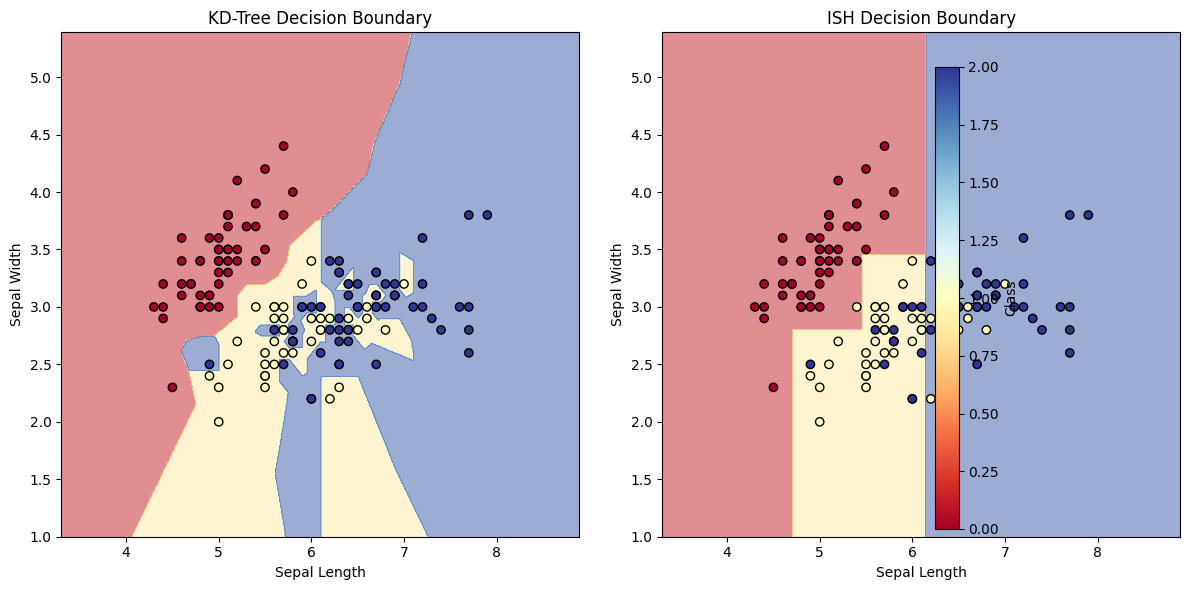

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from scipy.spatial import KDTree

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Select two features for simplicity
y = iris.target

# Create KDTree for the dataset
kd_tree = KDTree(X)

# Train a DecisionTreeClassifier as a proxy for ISH
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X, y)

# Create a mesh grid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict classes for the grid using KDTree
kd_tree_labels = []
for point in grid_points:
    _, idx = kd_tree.query(point)
    kd_tree_labels.append(y[idx])
kd_tree_labels = np.array(kd_tree_labels).reshape(xx.shape)

# Predict classes for the grid using ISH (DecisionTreeClassifier)
ish_labels = tree_clf.predict(grid_points).reshape(xx.shape)

# Plot decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
titles = ["KD-Tree Decision Boundary", "ISH Decision Boundary"]

for ax, labels, title in zip(axes, [kd_tree_labels, ish_labels], titles):
    ax.contourf(xx, yy, labels, alpha=0.5, cmap=plt.cm.RdYlBu)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=plt.cm.RdYlBu)
    ax.set_title(title)
    ax.set_xlabel("Sepal Length")
    ax.set_ylabel("Sepal Width")

plt.colorbar(scatter, ax=axes, orientation="vertical", label="Class")
plt.tight_layout()
plt.show()
